# Preprocessing the Data

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Gengerating the Data

In [3]:
for i in range(5000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0) 
    
for i in range(100000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)   

In [4]:
# print a sample from raw samples
[print(i) for i in train_samples[:10]]

64
71
64
95
35
72
15
68
19
84


[None, None, None, None, None, None, None, None, None, None]

In [5]:
# print a sample from raw labels
[print(i) for i in train_labels[:10]]

1
0
1
0
1
0
1
0
1
0


[None, None, None, None, None, None, None, None, None, None]

In [6]:
# converting to numpy array
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [7]:
# scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# print a sample from scaled samples
[print(i) for i in scaled_train_samples[:10]]

[0.5862069]
[0.66666667]
[0.5862069]
[0.94252874]
[0.25287356]
[0.67816092]
[0.02298851]
[0.63218391]
[0.06896552]
[0.81609195]


[None, None, None, None, None, None, None, None, None, None]

# Training the Network

In [9]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import sparse_categorical_crossentropy

E:\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [10]:
model = Sequential([
    Dense(16, input_shape=(scaled_train_samples.shape[1:]), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')    
])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Training the Net

In [12]:
model.compile(Adam(lr=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=32, epochs=5, shuffle=True, verbose=2)

Train on 189000 samples, validate on 21000 samples
Epoch 1/5
 - 23s - loss: 0.2568 - acc: 0.9344 - val_loss: 0.0791 - val_acc: 1.0000
Epoch 2/5
 - 19s - loss: 0.2188 - acc: 0.9446 - val_loss: 0.0611 - val_acc: 1.0000
Epoch 3/5
 - 19s - loss: 0.2127 - acc: 0.9457 - val_loss: 0.0588 - val_acc: 1.0000
Epoch 4/5
 - 19s - loss: 0.2109 - acc: 0.9460 - val_loss: 0.0592 - val_acc: 1.0000
Epoch 5/5
 - 19s - loss: 0.2101 - acc: 0.9462 - val_loss: 0.0531 - val_acc: 1.0000


# Preprocess Test Data

In [14]:
test_labels = []
test_samples = []

In [15]:
for i in range(1000):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0) 
    
for i in range(20000):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)   

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Predict

In [18]:
prediction = model.predict(scaled_test_samples, batch_size=32, verbose=0)

In [19]:
# printing a sample of the predictions
[print(i) for i in prediction[:10]]

[0.95325446 0.04674547]
[0.05235474 0.94764525]
[0.95334387 0.04665617]
[0.05114095 0.9488591 ]
[0.953701   0.04629898]
[0.05230141 0.9476986 ]
[0.9538321  0.04616793]
[0.0509846 0.9490154]
[0.9542279  0.04577206]
[0.0509846 0.9490154]


[None, None, None, None, None, None, None, None, None, None]

In [20]:
class_prediction = model.predict_classes(scaled_test_samples, batch_size=32, verbose=0)

In [21]:
[print(i) for i in class_prediction[:10]]

0
1
0
1
0
1
0
1
0
1


[None, None, None, None, None, None, None, None, None, None]

# Confusing Matrix

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [23]:
cm = confusion_matrix(test_labels, class_prediction)

In [24]:
# taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[20000  1000]
 [ 1000 20000]]


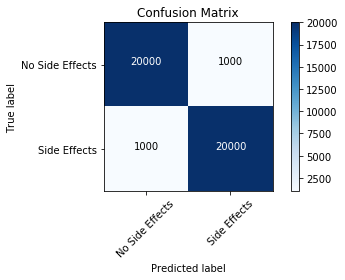

In [25]:
cm_class_labels = ['No Side Effects', 'Side Effects']
plot_confusion_matrix(cm, cm_class_labels, title='Confusion Matrix')

# Save and Load Model

In [26]:
model.save('models/Deeplizard_oneHiddenKeras.h5')

In [27]:
from keras.models import load_model
new_model = load_model('models/Deeplizard_oneHiddenKeras.h5')

In [28]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [29]:
new_model.get_weights()

[array([[-0.29914993, -0.5658993 , -0.37603307, -0.2294279 , -0.26521865,
          0.7149355 ,  0.4105768 , -0.11199683,  0.8548587 , -0.5728488 ,
          0.6595871 , -0.11251396,  0.72197497, -0.44811326, -0.04006141,
          0.5805998 ]], dtype=float32),
 array([ 0.17872913,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.414481  ,  0.1172111 ,  0.        , -0.49739113,  0.        ,
        -0.381686  ,  0.        , -0.41859478,  0.        ,  0.        ,
        -0.349923  ], dtype=float32),
 array([[-1.22798872e+00, -2.16321200e-01, -1.03525221e-01,
          4.83313799e-02,  1.83223262e-01, -4.87914771e-01,
         -4.27953452e-02, -1.02139139e+00, -1.54344112e-01,
         -1.40362969e-02, -1.37878680e+00, -7.34412074e-02,
         -3.47508609e-01, -1.60388052e-02,  1.46147221e-01,
          6.23724461e-02,  1.91413984e-01, -1.12351179e+00,
         -7.70243704e-02, -5.95859885e-01,  5.92939556e-02,
          1.28918305e-01,  2.55514622e-01, -1.03984690e+00,
 

In [30]:
new_model.optimizer

# model.to_jason() : Saving only the architecture

In [32]:
jason_string = model.to_json()

In [33]:
jason_string

'{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "b

In [34]:
from keras.models import model_from_json
model_architecture = model_from_json(jason_string)

In [35]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# model.save_weights() : Saving only the weights

In [36]:
model.save_weights('models/Deeplizard_oneHiddenKeras_weights.h5')

In [37]:
model2 = Sequential([
    Dense(16, input_shape=(scaled_train_samples.shape[1:]), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')    
])

In [38]:
model2.load_weights('models/Deeplizard_oneHiddenKeras_weights.h5')